<h1 align="center">Analizando Blockchain en medium en 2019</h1>

Para ver sobre qué se había escrito más en 2019 en medium, me propuse hacer un análisis de las publicaciones para ver si se podía sacar alguna conclusión de como había sido el año y que había despertado mayor interés. Los datos están extraidos usando el proyecto de Harrison: https://github.com/harrisonjansma/Medium_Scraper

<h3 align="center">Importando las librerías necesarias y cargando los datos</h3>


In [21]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from collections import Counter
import plotly.io as pio
import plotly.graph_objects as go

medium = pd.read_csv("Medium_Clean_2019.csv")
medium = medium.drop("Unnamed: 0", axis=1)

medium_2018 = pd.read_csv("Medium_Clean_2018.csv")
medium_2018 = medium_2018.drop("Unnamed: 0", axis=1)

medium.head(2)

,Title,Subtitle,Image,Author,Publication,Year,Month,Day,Tag,Reading_Time,Claps,url,Author_url
0,Crypto Theses for 2019,My thoughts on the state of crypto in 2018 and...,1,Arjun Balaji,NaN,2019,1,1,blockchain,31,13100.0,https://medium.com/@arjunblj/crypto-theses-for...,https://medium.com/@arjunblj
1,"Fifteen dead cryptocurrency predictions, twelv...",NaN,1,Nic Carter,NaN,2019,1,1,blockchain,22,3600.0,https://medium.com/@nic__carter/fifteen-dead-c...,https://medium.com/@nic__carter


<h3 align="center">¿Cuántos datos componen el dataset?</h3>

In [22]:
print("Número de artículos: ", medium.shape[0])
print("Número de autores: ", medium.Author.value_counts().shape[0])
print("Número de publicaciones: ", medium.Publication.value_counts().shape[0])

Número de artículos:  70168
Número de autores:  17696
Número de publicaciones:  4408


<h3 align="center">¿Cuántos artículos se han escrito?</h3>

In [23]:
def show_bar_plot(x,y,title):
    fig = go.Figure(data=[go.Bar(x=x, y=y)])
    fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(102,178,255)',
    marker_line_width=1.5, opacity=0.9)
    fig.update_layout(
        title={
            'text':title, 
            'y':0.9, 
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="#7f7f7f"
        ))
    fig.show(renderer="svg")

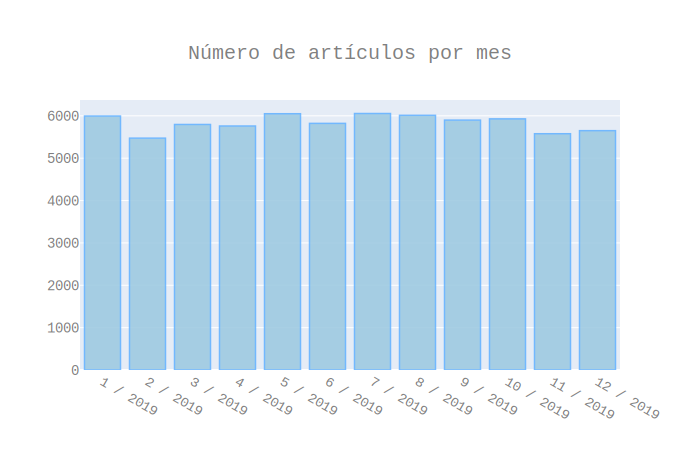

In [24]:
years = [2019]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
ym_counts = []
bar_x = []
for year in years:
    for month in months:
        ym_counts.append(medium[(medium.Year==year)&(medium.Month==month)].shape[0])
        bar_x.append(str(month)+" / "+str(year))

show_bar_plot(bar_x, ym_counts, 'Número de artículos por mes')

<h3 align="center">Si lo comparamos con el año pasado</h3>

In [25]:
years = [2018]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
ym_counts_2018 = []
bar_x = []
for year in years:
    for month in months:
        ym_counts_2018.append(medium_2018[(medium_2018.Year==year)&(medium_2018.Month==month)].shape[0])
        bar_x.append(str(month)+" / "+str(year))

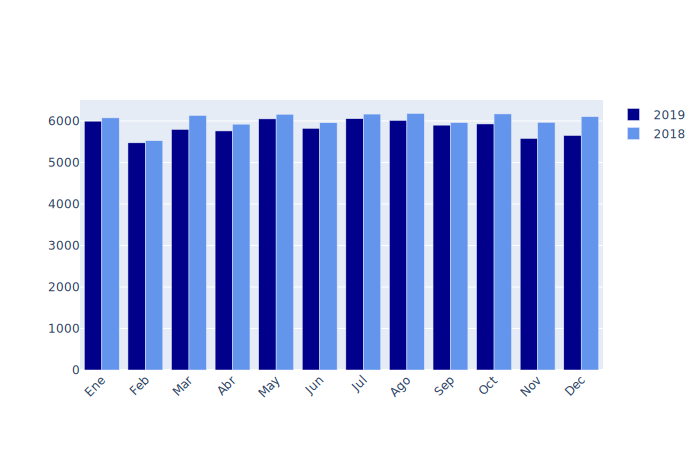

In [26]:
months = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
          'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=ym_counts,
    name='2019',
    marker_color='darkblue'
))
fig.add_trace(go.Bar(
    x=months,
    y=ym_counts_2018,
    name='2018',
    marker_color='cornflowerblue'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show(renderer="svg")

<h3 align="center">¿Cuáles son las palabras más utilizadas en los títulos?</h3>

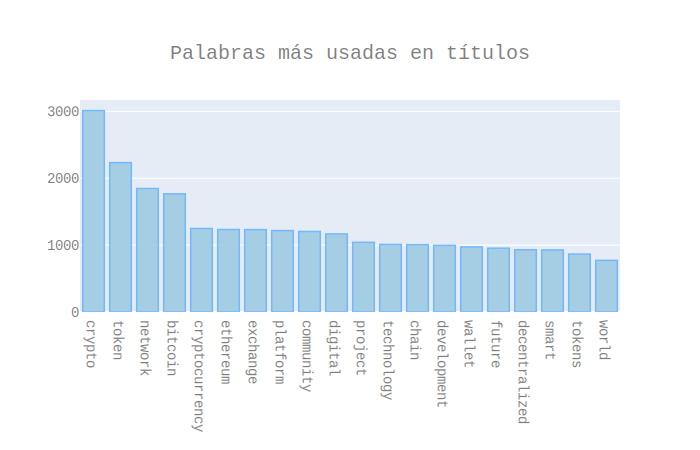

In [27]:
titles = medium.Title.str.cat(sep=', ')

for char in '-.,\n':
    titles=titles.replace(char,' ')
titles = titles.lower()
word_list = titles.split()

stop_words = set(stopwords.words('english')) 
stops = {'new','&','|','2','1','update','weekly','report','first','0','2019', 'blockchain'}
stop_words = set(list(stop_words) + list((stops)))
    
filtered_sentence = [w for w in word_list if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_list: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
        

most_common = Counter(filtered_sentence).most_common(20)

labels, ys = zip(*most_common)
xs = np.arange(len(labels)) 
show_bar_plot(labels, ys, 'Palabras más usadas en títulos')

<h3 align="center">¿Que escritores han escrito más artículos?</h3>

In [28]:
def print_list(data, metric):
    dash = '-' * 100
    for i in range(len(data)):
        if i == 0:
          print(dash)
          print('{:<8s}{:<7s}{:^25s}{:^12s}'.format("Rank",metric,"Author","Url"))
          print(dash)
        auth = data.index[i]
        link = medium[medium.Author==auth].Author_url.values[0]
        link = link.split("?")[0]
        print('{:<8d}{:<10d}{:<25s}{:<20s}'.format(i+1,int(data[i]),auth, link))
        
print("10 Autores con más artículos")
print()
print_list( medium.Author.value_counts()[1:11], "# Articles")

10 Autores con más artículos

----------------------------------------------------------------------------------------------------
Rank    # Articles         Author              Url     
----------------------------------------------------------------------------------------------------
1       345                                https://medium.com/@tokenPocket_jp
2       264       Blockchain Cuties        https://medium.com/@blockchaincutie
3       237       OKEx                     https://medium.com/@OKEx
4       221       Altcoin Magazine         https://medium.com/@altcoinmagazine
5       203       ConsenSys                https://media.consensys.net/@ConsenSys
6       186       IOS Foundation           https://medium.com/@iostoken
7       152       Marko Vidrih             https://medium.com/@VidrihMarko
8       144       QuarkChain               https://medium.com/@quarkchainio
9       137       Juan Jos  Calder n Amadorhttps://medium.com/@eraser
10      130       mori MCH       

<h3 align="center">¿Cuáles fueron las publicaciones más activas?</h3>

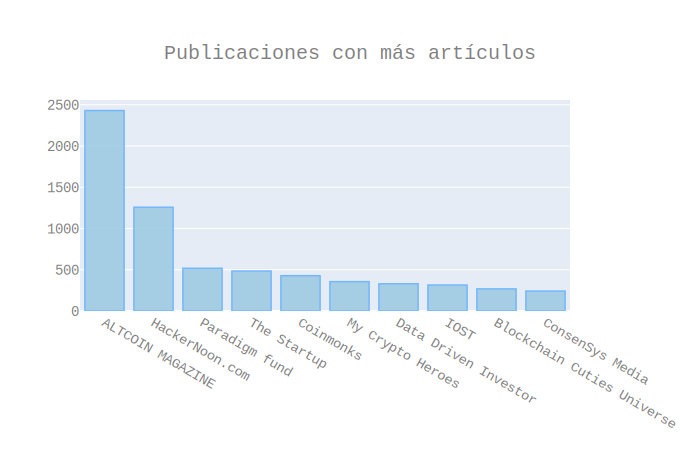

In [29]:
show_bar_plot(medium.Publication.value_counts()[:10].index, 
              medium.Publication.value_counts()[:10].values, 
              'Publicaciones con más artículos')

<h3 align="center">Vamos a ver que palabras son las más utlizadas en los títulos respecto a una categoría</h3>

In [30]:
medium['title_low'] = medium['Title'].str.lower()

def count_title(term):
    count = medium['title_low'].str.contains(term)==True
    return count[count == True].count()
    

def apparitons_count(list):
    apparitions = []
    for i in list:
        apparitions.append(count_title(i))
    return pd.Series(apparitions, index=list)

<h3 align="center">¿Que blockchains son las más escritas en títulos de artículos?</h3>

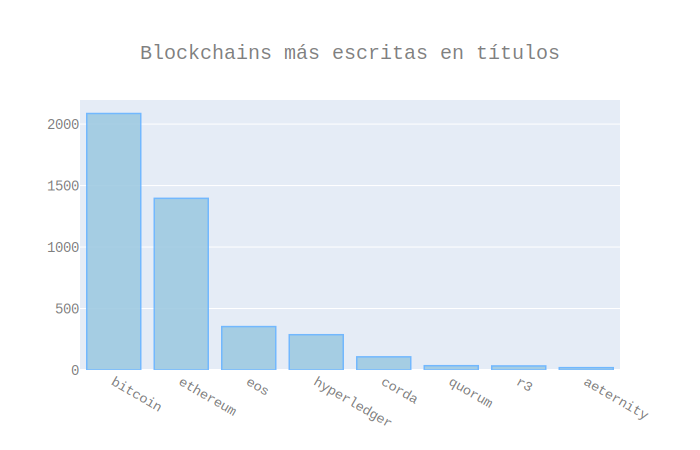

In [31]:
blockchains =['bitcoin', 'ethereum', ' eos ', 'aeternity', 'hyperledger', 'quorum', 'r3', 'corda']
apparitions = apparitons_count(blockchains)
apparitions.sort_values(inplace=True, ascending=False)
show_bar_plot(apparitions.index, apparitions.values, 'Blockchains más escritas en títulos')

<h3 align="center">¿Que criptomomedas son las más escritas en títulos de artículos?</h3>

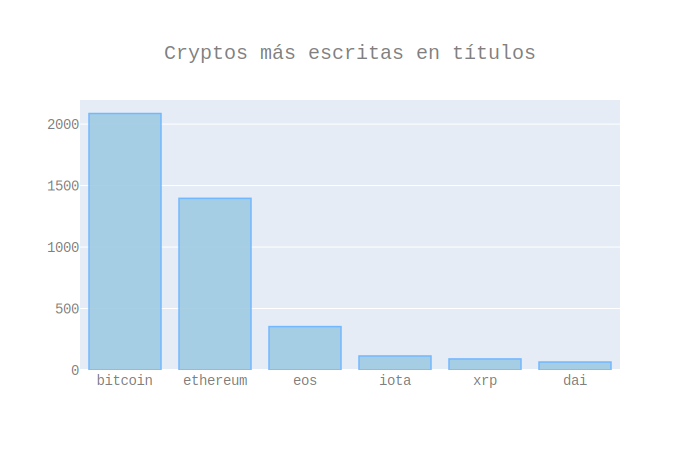

In [32]:
cryptos =['bitcoin', 'ethereum', 'xrp', ' dai ', ' eos ', 'iota']
apparitions = apparitons_count(cryptos)
apparitions.sort_values(inplace=True, ascending=False)
show_bar_plot(apparitions.index, apparitions.values, 'Cryptos más escritas en títulos')

<h3 align="center">¿Que herramientas de desarrollo son las más escritas en títulos de artículos?</h3>

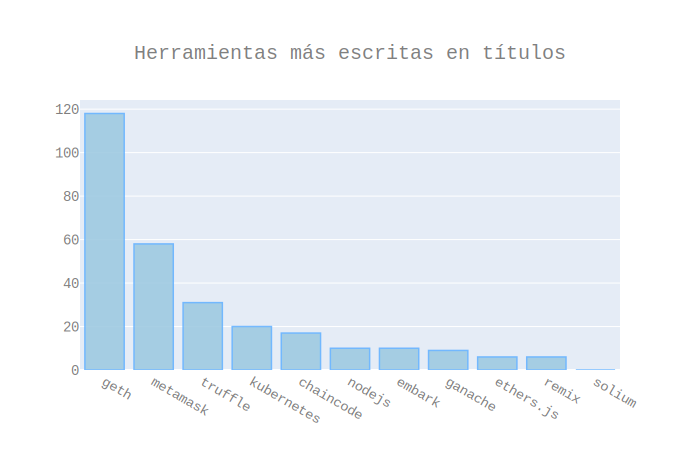

In [33]:
tools=['ganache', 'truffle', 'kubernetes', 'chaincode', 'remix', 'solium'
       , 'geth', 'embark', 'metamask', 'ethers.js', 'nodejs']
apparitions = apparitons_count(tools)
apparitions.sort_values(inplace=True, ascending=False)
show_bar_plot(apparitions.index, apparitions.values, 'Herramientas más escritas en títulos')

<h3 align="center">¿Que lenguajes son las más escritas en títulos de artículos?</h3>

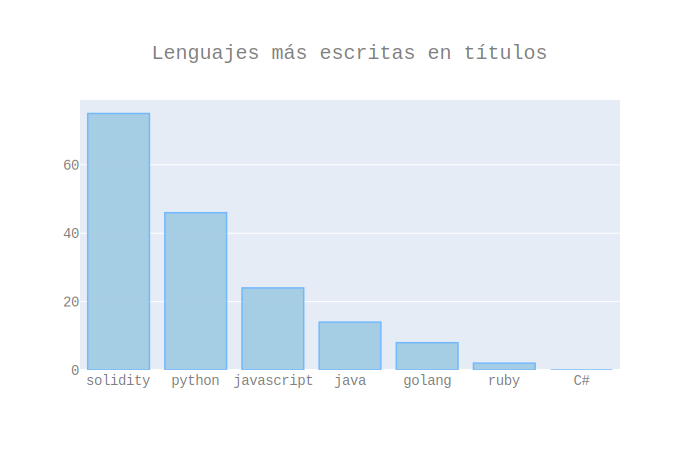

In [34]:
languages=[' java ', 'golang', 'python', 'ruby', 'solidity', 'javascript', 'C#']
apparitions = apparitons_count(languages)
apparitions.sort_values(inplace=True, ascending=False)
show_bar_plot(apparitions.index, apparitions.values, 'Lenguajes más escritas en títulos')

<h3 align="center">¿Que tendencias han dominado en títulos de artículos?</h3>

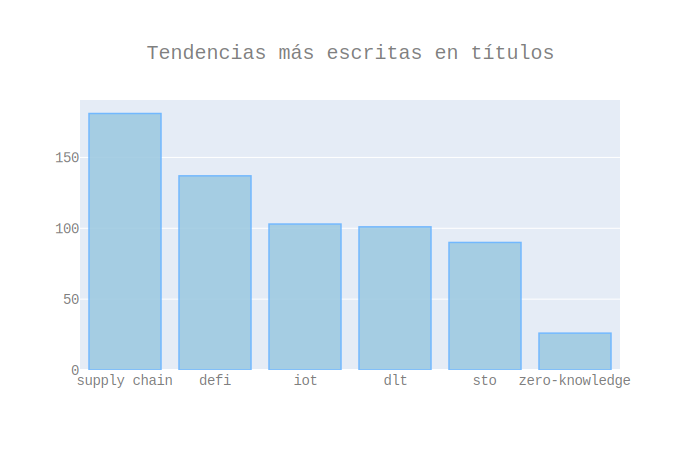

In [35]:
trends =['supply chain', ' defi ', ' sto ', 'dlt', 'zero-knowledge', ' iot ']
apparitions = apparitons_count(trends)
apparitions.sort_values(inplace=True, ascending=False)
show_bar_plot(apparitions.index, apparitions.values, 'Tendencias más escritas en títulos')

<h3 align="center">¿Se han mantenido las tendencias a ?</h3>

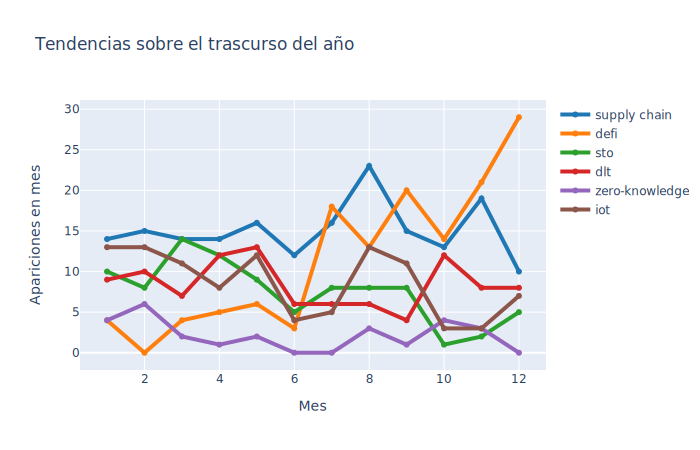

In [36]:
colors=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
        'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
        'rgb(148, 103, 189)', 'rgb(140, 86, 75)']

def is_in_title(term, col):
    if str(term) in str(col):
        return 1
    else:
        return 0

for i in trends:
    medium[i] = medium.title_low.apply(lambda x: is_in_title(i, x))
    
trends_df = medium.groupby(['Month'], sort=True).sum()

fig = go.Figure()

length = len(trends) 
for i in range(length): 
    fig.add_trace(go.Scatter(x=trends_df.index, y=trends_df[trends[i]], name=str(trends[i]),
                         line=dict(color=colors[i], width=4)))
    
fig.update_layout(title='Tendencias sobre el trascurso del año',
                   xaxis_title='Mes',
                   yaxis_title='Apariciones en mes')


fig.show(renderer="svg")

<h3 align="center">¿Que artículos son los más aplaudidos?</h3>

In [37]:
sorted = medium.sort_values(by=['Claps'], inplace=False, ascending=False)
for i in range (10):
    print("Claps:" ,sorted.iloc[i].Claps)
    print("URL:" ,sorted.iloc[i].url)

Claps: 74000.0
URL: https://medium.com/@flamehyre/flamehyre-token-a-brief-introduction-66d116d09097
Claps: 67000.0
URL: https://medium.com/anatha-io/on-fluid-democracy-a-dynamic-shape-to-the-future-d89a6988674
Claps: 57000.0
URL: https://medium.com/@ezystayz/why-accommodation-is-so-costly-on-centralized-services-c7c6bebd1de2
Claps: 53000.0
URL: https://medium.com/blockstamp/hello-newly-minted-blockstampers-heres-how-to-multiply-your-bounty-on-blockstamp-games-8f620e5faa02
Claps: 52000.0
URL: https://medium.com/iconcm/youtube-update-p-rep-candidates-intro-video-releases-51cbffd845bf
Claps: 34000.0
URL: https://medium.com/@team_90186/xera-not-just-another-new-crypto-exchange-4e5be8293cc2
Claps: 31000.0
URL: https://medium.com/fleta-first-chain/breaking-down-fletas-proof-of-formulation-2860c6cb7178
Claps: 30000.0
URL: https://medium.com/@DocumentTailor/join-doctailors-token-airdrop-claim-25-free-doct-tokens-worth-23-usd-6d6a1f8b61b2
Claps: 30000.0
URL: https://medium.com/@thecryptoconsult

<h3 align="center">¿Que autores son los más aplaudidos?</h3>

<h3 align="center">Si cogemos los mil artículos más aplaudidos, ¿Las palabras más usadas son las mismas que en el global?</h3>

In [38]:
top_1k = medium.sort_values("Claps", ascending=False)[:1000]

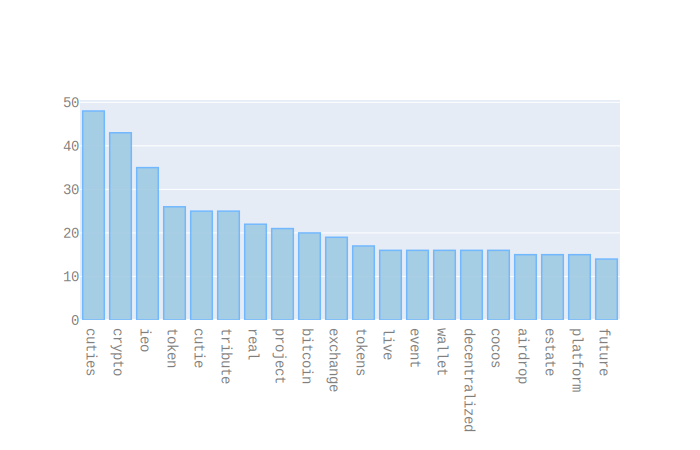

In [39]:
titles = top_1k.Title.str.cat(sep=', ')

for char in '-.,\n':
    titles=titles.replace(char,' ')
titles = titles.lower()
word_list = titles.split()

stop_words = set(stopwords.words('english')) 
stops = {'new','&','|','2','1','update','weekly','report','first','0','2019', 'blockchain'}
stop_words = set(list(stop_words) + list((stops)))
    
filtered_sentence = [w for w in word_list if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_list: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
        

most_common = Counter(filtered_sentence).most_common(20)

labels, ys = zip(*most_common)
xs = np.arange(len(labels)) 
show_bar_plot(labels, ys, '')